## Test encoding of the target column
* transform Calories with Yeo-Johnson
* divide by Duration (should be linear)

### 1) Yeo-Johnson

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_orig = pd.read_csv('calories.csv')

TARGET_COL = 'Calories'

<AxesSubplot:xlabel='Calories', ylabel='Count'>

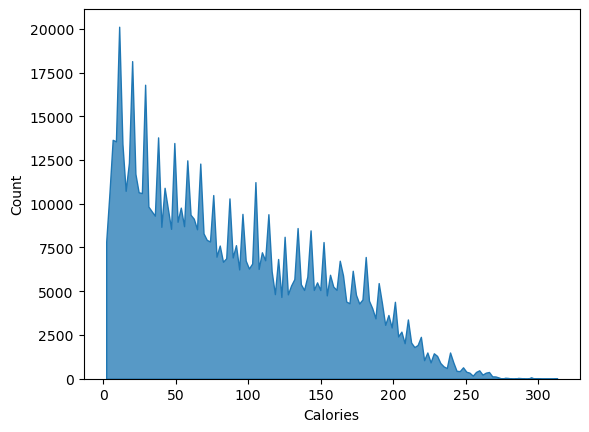

In [2]:
sns.histplot(data=data_train, x='Calories', element="poly")

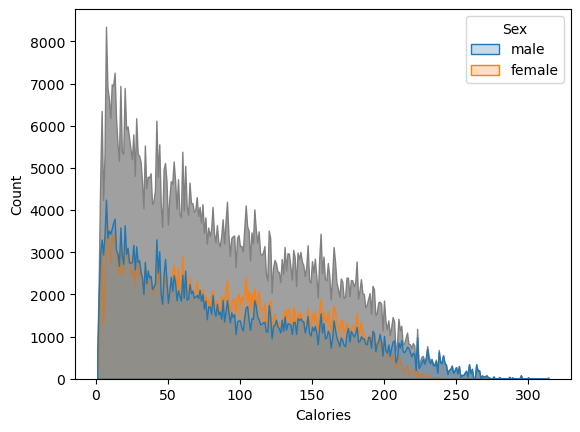

In [3]:
def make_integer_hist_plot(df, col):
    low = df[col].min()
    high = df[col].max()
    bins = np.linspace(low-0.5, high+0.5, round(high-low+2))
    sns.histplot(data=df, x=col, color='gray', bins=bins, element="poly")
    sns.histplot(data=df, x=col, hue='Sex', bins=bins, element="poly")

make_integer_hist_plot(data_train, "Calories")

In [4]:
from sklearn.preprocessing import PowerTransformer
skl_pt = PowerTransformer(method='yeo-johnson')
data_train['Calories'] = skl_pt.fit_transform(data_train[['Calories']])

<AxesSubplot:xlabel='Calories', ylabel='Count'>

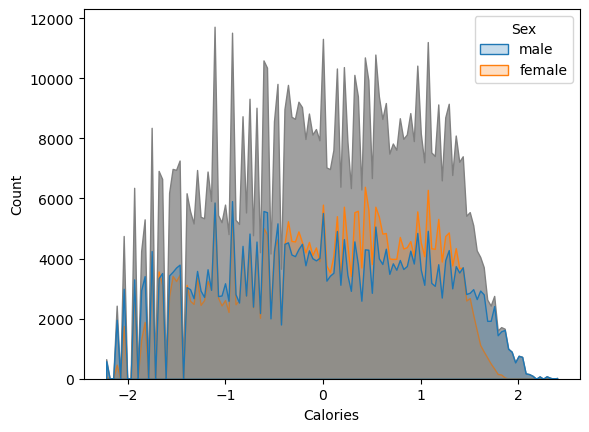

In [5]:
sns.histplot(data=data_train, x='Calories', color='gray', element="poly")
sns.histplot(data=data_train, x='Calories', hue='Sex', element="poly")

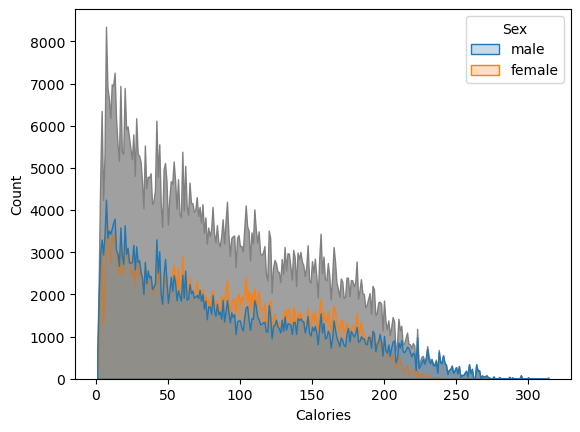

In [6]:
data_train['Calories'] = skl_pt.inverse_transform(data_train[['Calories']])
make_integer_hist_plot(data_train, "Calories")

### 2) divide by Duration

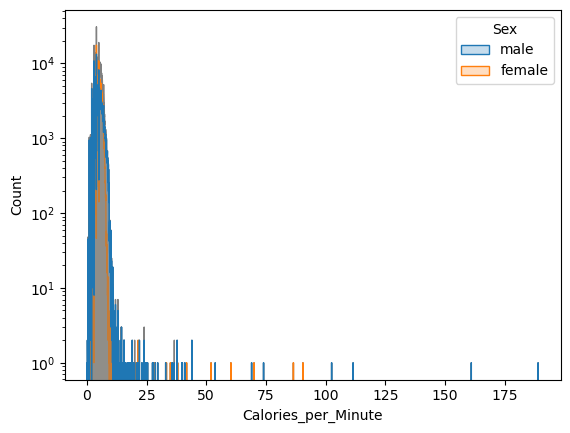

In [11]:
data_train['Calories_per_Minute'] = data_train['Calories'] / data_train['Duration']
sns.histplot(data=data_train, x='Calories_per_Minute', color='gray', element="poly")
sns.histplot(data=data_train, x='Calories_per_Minute', hue='Sex', element="poly")
#plt.xscale('log')
plt.yscale('log')

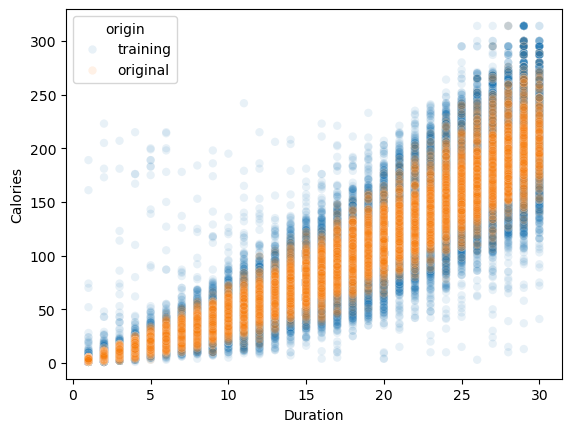

In [19]:
data_train['origin'] = 'training'
data_orig['origin'] = 'original'

# Append the DataFrames
data_full = pd.concat([data_train, data_orig], axis=0, ignore_index=True)

sc = sns.scatterplot(data=data_full, x='Duration', y='Calories', hue='origin', alpha=0.1)
plt.savefig('duration_calories.png')